In [1]:
# Importing the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [3]:
# Import the data

In [4]:
data = pd.read_csv("D:\Data science\Assignments docs\Decision tree\Company_Data.csv")
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
data.shape

(400, 11)

In [6]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [7]:
# Unique values in each column

In [8]:
data.nunique()

Sales          336
CompPrice       73
Income          98
Advertising     28
Population     275
Price          101
ShelveLoc        3
Age             56
Education        9
Urban            2
US               2
dtype: int64

In [9]:
# Converting the continuous values of "Sales" into categorial values of "High" and "Low"

In [10]:
sales = pd.cut(data.Sales,bins=[0,8,17],labels=['Low','High'])

In [11]:
# Combining the converted values into the original dataset and removing earlier column

In [12]:
data.insert(1,'sales',sales)
data= data.iloc[:,1:12]
data.head()

,sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,High,138,73,11,276,120,Bad,42,17,Yes,Yes
1,High,111,48,16,260,83,Good,65,10,Yes,Yes
2,High,113,35,10,269,80,Medium,59,12,Yes,Yes
3,Low,117,100,4,466,97,Medium,55,14,Yes,Yes
4,Low,141,64,3,340,128,Bad,38,13,Yes,No


## Data Exploration

In [13]:
# Value counts for the output variable

In [14]:
data.sales.value_counts()

Low     235
High    164
Name: sales, dtype: int64

In [15]:
import seaborn as sns

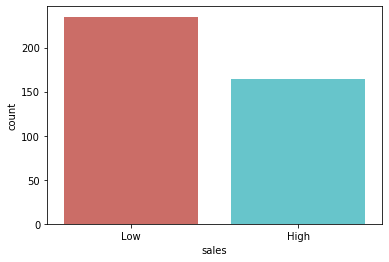

In [16]:
sns.countplot(data["sales"], palette="hls")

In [17]:
# Counts for "Low" sales is high compared to "High" counts

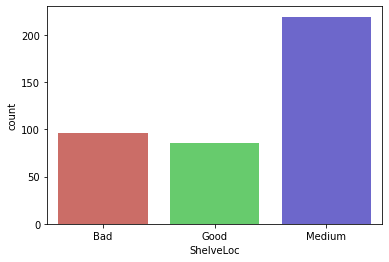

In [18]:
sns.countplot(data["ShelveLoc"], palette="hls")

In [19]:
# There are more "Medium" quality shleves in many locations compared to "Good" and "Bad" category shelves

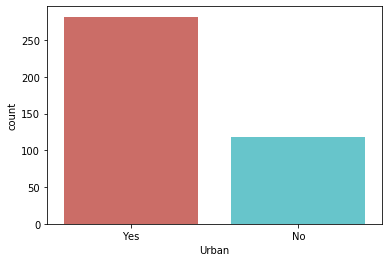

In [20]:
sns.countplot(data["Urban"], palette="hls")

In [21]:
# Most of the stores are in "Urban" locations comapred to "Non-urban"

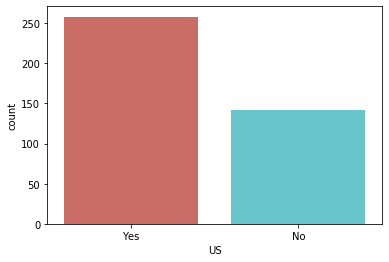

In [22]:
sns.countplot(data["US"], palette="hls")

In [23]:
# Most of the stores are located in "US" and few others in other countries

{'whiskers': [<matplotlib.lines.Line2D at 0x1cf1d2c2fc8>,
 'caps': [<matplotlib.lines.Line2D at 0x1cf1d2c7f88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cf1d2c26c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1cf1d2cbf08>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cf1d2cbdc8>],
 'means': []}

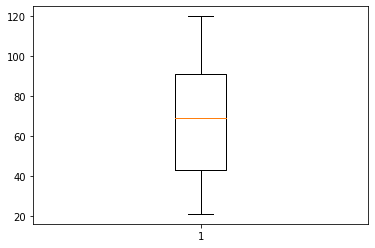

In [24]:
plt.boxplot(data["Income"])

In [25]:
# Income of the community ranges from 20 to 120 thousands with mean income of around 68 thoudands

{'whiskers': [<matplotlib.lines.Line2D at 0x1cf1d32cfc8>,
 'caps': [<matplotlib.lines.Line2D at 0x1cf1d32eb88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cf1d32c808>],
 'medians': [<matplotlib.lines.Line2D at 0x1cf1d333b08>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cf1d339a08>],
 'means': []}

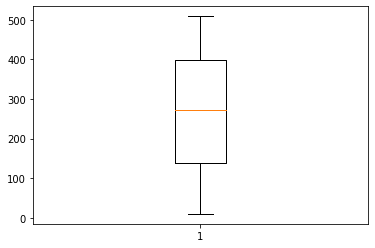

In [26]:
plt.boxplot(data["Population"])

In [27]:
# Population of the region ranges from 10 to 509 thousands with mean population of around 260 thousands

{'whiskers': [<matplotlib.lines.Line2D at 0x1cf1d394fc8>,
 'caps': [<matplotlib.lines.Line2D at 0x1cf1d39ab88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cf1d394888>],
 'medians': [<matplotlib.lines.Line2D at 0x1cf1d39eb08>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cf1d3a3988>],
 'means': []}

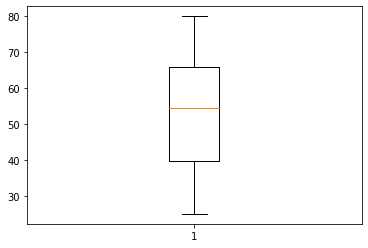

In [28]:
plt.boxplot(data["Age"])

In [29]:
# Average age of population ranges from 25 to 80, with mean age being 53 

In [30]:
# Obtaining the dummy variables for 'ShelveLoc','Urban','US'

In [31]:
data1 = pd.get_dummies(data, columns=['ShelveLoc','Urban','US'], drop_first = True)
data1.head()

,sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,High,138,73,11,276,120,42,17,0,0,1,1
1,High,111,48,16,260,83,65,10,1,0,1,1
2,High,113,35,10,269,80,59,12,0,1,1,1
3,Low,117,100,4,466,97,55,14,0,1,1,1
4,Low,141,64,3,340,128,38,13,0,0,1,0


In [32]:
# Checking for NA values in the dataset

In [33]:
data1.isna().sum()

sales               1
CompPrice           0
Income              0
Advertising         0
Population          0
Price               0
Age                 0
Education           0
ShelveLoc_Good      0
ShelveLoc_Medium    0
Urban_Yes           0
US_Yes              0
dtype: int64

In [34]:
# There is one NA value in the dataset

In [35]:
data1 = data1.dropna()               # Removing the NA value

In [36]:
data1.shape

(399, 12)

In [37]:
# Divivng the data into X and Y i.e. predictors and target

In [38]:
X = data1.iloc[:,1:]
Y = data1.iloc[:,0]

In [39]:
# Splitting the data into training and testing dataset

In [40]:
x_train,x_test,y_train,y_test= train_test_split(X,Y, test_size=0.2)

## Random Forest model

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
# Building the Random forest model 

In [43]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)

In [44]:
clf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [45]:
# Predicting the target values using the model

In [46]:
y_pred = clf.predict(x_test)
y_pred

array(['Low', 'High', 'Low', 'Low', 'Low', 'Low', 'High', 'High', 'Low',
       'Low', 'Low', 'High', 'Low', 'Low', 'High', 'High', 'Low', 'Low',
       'Low', 'Low', 'High', 'Low', 'High', 'Low', 'Low', 'Low', 'Low',
       'High', 'Low', 'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'High',
       'High', 'Low', 'High', 'Low', 'High', 'Low', 'Low', 'Low', 'High',
       'High', 'Low', 'High', 'High', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'High', 'Low', 'Low', 'Low', 'High', 'Low', 'Low', 'Low',
       'Low', 'High', 'Low', 'Low', 'High', 'Low', 'High', 'Low', 'Low',
       'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'High', 'High'],
      dtype=object)

In [47]:
# Value counts of predicted values

In [48]:
pd.Series(y_pred).value_counts()

Low     54
High    26
dtype: int64

In [49]:
# Buliding confusion matrix

In [50]:
confusion_matrix(y_pred, y_test)

array([[25,  1],
       [10, 44]], dtype=int64)

In [51]:
pd.crosstab(y_pred, y_test)              # Cross tabulation can also be used

sales,Low,High
row_0,,
High,1,25
Low,44,10


In [52]:
# Accuracy of the model

In [53]:
Accuracy_entropy = accuracy_score(y_pred,y_test)
Accuracy_entropy

0.8625

In [54]:
# Using the Random Forest model again but using the "entropy" as criterion

In [55]:
model1 = RandomForestClassifier(criterion="entropy", n_estimators=100, random_state=0)

In [56]:
model1.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [57]:
# Predicting the target values using the model

In [58]:
y_pred1 = model1.predict(x_test)
y_pred1

array(['Low', 'High', 'Low', 'Low', 'Low', 'Low', 'High', 'High', 'Low',
       'Low', 'Low', 'High', 'Low', 'Low', 'High', 'High', 'Low', 'Low',
       'Low', 'Low', 'High', 'Low', 'High', 'Low', 'Low', 'Low', 'Low',
       'High', 'Low', 'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'High',
       'High', 'Low', 'High', 'Low', 'High', 'Low', 'Low', 'Low', 'High',
       'High', 'Low', 'High', 'High', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'High', 'High', 'Low', 'Low', 'High', 'Low', 'Low', 'Low',
       'Low', 'High', 'Low', 'High', 'High', 'Low', 'High', 'Low', 'Low',
       'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'High', 'High'],
      dtype=object)

In [59]:
# Value counts of predicted values

In [60]:
pd.Series(y_pred1).value_counts()

Low     52
High    28
dtype: int64

In [61]:
# Buliding the confusion matrix

In [62]:
confusion_matrix(y_pred1, y_test)

array([[27,  1],
       [ 8, 44]], dtype=int64)

In [63]:
# Accuracy of the model

In [64]:
Accuracy_entropy = accuracy_score(y_pred1,y_test)
Accuracy_entropy

0.8875

In [65]:
# Accuracy with "entropy" as criterion is almost same as the one with "gini"

In [66]:
# Checking the accuracy of the model with different no. of trees 

In [67]:
model2 = RandomForestClassifier(n_estimators=200,random_state=0)

In [68]:
model2.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [69]:
# Predicting the target value using the model

In [70]:
y_pred2= model2.predict(x_test)
y_pred2

array(['Low', 'High', 'Low', 'Low', 'Low', 'Low', 'High', 'High', 'Low',
       'Low', 'Low', 'High', 'Low', 'Low', 'High', 'High', 'Low', 'Low',
       'Low', 'Low', 'High', 'Low', 'High', 'Low', 'Low', 'Low', 'Low',
       'High', 'Low', 'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'High',
       'High', 'Low', 'High', 'Low', 'High', 'Low', 'Low', 'Low', 'High',
       'High', 'Low', 'High', 'High', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'High', 'Low', 'Low', 'Low', 'High', 'Low', 'Low', 'Low',
       'Low', 'High', 'Low', 'Low', 'High', 'Low', 'High', 'Low', 'Low',
       'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'High', 'High'],
      dtype=object)

In [71]:
# Confusion matrix

In [72]:
confusion_matrix(y_pred2,y_test)

array([[25,  1],
       [10, 44]], dtype=int64)

In [73]:
# Accuracy 

In [74]:
Accuracy_depth =accuracy_score(y_pred2,y_test)
Accuracy_depth

0.8625

In [75]:
# Highest accuracy of 86.25 % is achieved with n_estimators value of 200

In [76]:
# Getting the feature important variables in the dataset

In [77]:
feature_imp = pd.Series(model2.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

Price               0.219924
Income              0.118084
ShelveLoc_Good      0.116854
Advertising         0.115676
CompPrice           0.114969
Age                 0.109268
Population          0.082171
Education           0.055024
ShelveLoc_Medium    0.031969
US_Yes              0.020763
Urban_Yes           0.015299
dtype: float64

In [78]:
import seaborn as sns

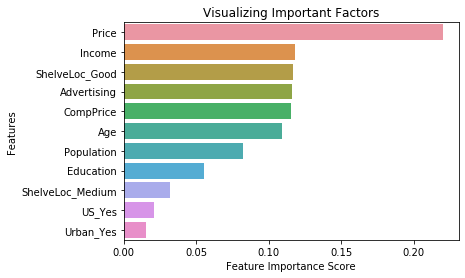

In [79]:
sns.barplot(feature_imp, feature_imp.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Factors")
plt.show()

In [80]:
# Variable "Price" is the most important feature in the dataset and 'Urban', 'US' are the least important ones hence elimintaing them

## Random Forest model with important features

In [81]:
data1.head()

,sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,High,138,73,11,276,120,42,17,0,0,1,1
1,High,111,48,16,260,83,65,10,1,0,1,1
2,High,113,35,10,269,80,59,12,0,1,1,1
3,Low,117,100,4,466,97,55,14,0,1,1,1
4,Low,141,64,3,340,128,38,13,0,0,1,0


In [82]:
# Redefining the predictors and target variables

In [83]:
X1 = data1.iloc[:,1:10]
Y1 = data1.iloc[:,0]

In [84]:
# Spliting the data into training and testing

In [85]:
x1_train, x1_test, y1_train, y1_test = train_test_split(X1,Y1, test_size = 0.2)

In [86]:
# Buliding Random Forest classifier

In [87]:
new_model = RandomForestClassifier(n_estimators=500, random_state=0)

In [88]:
new_model.fit(x1_train, y1_train)

RandomForestClassifier(n_estimators=500, random_state=0)

In [89]:
# Predicting the target values using the model

In [90]:
y_pred3 = new_model.predict(x1_test)
y_pred3

array(['High', 'Low', 'High', 'Low', 'High', 'Low', 'Low', 'Low', 'High',
       'High', 'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'High', 'Low',
       'High', 'Low', 'Low', 'Low', 'High', 'Low', 'Low', 'Low', 'High',
       'High', 'High', 'Low', 'Low', 'Low', 'Low', 'High', 'Low', 'Low',
       'Low', 'Low', 'High', 'Low', 'High', 'Low', 'Low', 'Low', 'Low',
       'High', 'Low', 'Low', 'Low', 'Low', 'High', 'High', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'High', 'Low',
       'Low', 'Low', 'Low', 'Low', 'High', 'High', 'Low', 'Low', 'High',
       'High', 'High', 'Low', 'High', 'Low', 'Low', 'High', 'Low'],
      dtype=object)

In [91]:
# Confusion matrix

In [92]:
confusion_matrix(y_pred3,y1_test)

array([[22,  4],
       [15, 39]], dtype=int64)

In [93]:
# Accuracy 

In [94]:
Accuracy_new = accuracy_score(y_pred3,y1_test)
Accuracy_new

0.7625

In [95]:
# There is not much change in the accuracy of model even after removing the less feature important variables like 'US' and 'Urban'

## Observations

In [96]:
# The Random Forest model with "gini" criterion and with n_estimators of 200 has given the highest accuracy of 86.25 % 
# Removing less important feature variables like "US" and "Urban" hasn't increased the accuracy of the model, hence the removed variables has to be considered